NEWS CLASSIFIER PROJECT
Islamic Azad University, Tehran North Branch

importing Requireds

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score , classification_report
from sklearn.naive_bayes import MultinomialNB
import tensorflow as tf
from datacleaner import load_stopwords , clean_doc

Importing datasets

In [2]:
dataset = "NLP datatset title.csv"

In [3]:
# reading and ploting data
#df stands for data frame
df = pd.read_csv(dataset , encoding='utf-8' ) # read data with pandas
print(df.head())
df = df.dropna(axis = 0, how ='any') #for dealing with null error for empty data


                                               Title category
0  تحلیل فارن پالیسی: یک اتفاق خوب برای ایران ؛ د...    سیاسی
1  سخنگوی دولت: مسیری جز مقاومت همراه با اعتدال و...    سیاسی
2  روایت وزیر دولت دهم از ماجرای خانه‌نشینی روزه ...    سیاسی
3          موضع مشترک انگلیس و فرانسه در برابر ترامپ    سیاسی
4  جوانان اصلاح‌طلب به صف کاندیداها پیوستند/ آمار...    سیاسی


Pre processing

In [4]:

X = df["Title"].apply(lambda x :clean_doc(x)) # title's data frame (title is a column in data set)

#clean_doc is a custom made function design to tokenize and normalize and clean up

#in this case clean_doc is being applyed to title column of our data set

Y = df["category"] # data frame for category column in data set


Adding int index for labels from 0 to 3

[2 2 2 ... 0 0 0]


C:\Users\my pc\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


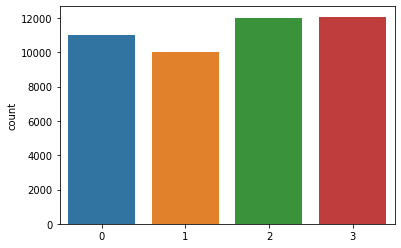

In [5]:
le = LabelEncoder() #run an encoder for the category column (from sklearn package)
Y = le.fit_transform(Y) #fit the encoder on data
print(Y)
sns.countplot(Y) # plot them to view to make sure our data is balance d
plt.show()
# 0 equal to "سیاسی"
# 1 equal to "ورزشی"
# 2 equal to "اقتصادی"
# 3 equal to "اجتماعی"


Vectorizing

In [6]:
# we used tf_idf instead of bag of word because we acheived more accuracy 
#tf_idf gives our data index and value
from sklearn.feature_extraction.text import TfidfVectorizer
X, y = df.Title.fillna(' '), df.category
tf=TfidfVectorizer()
x=tf.fit_transform(X) #fit on data
print(x)


  (0, 1898)	0.13468457197870273
  (0, 3696)	0.4177563028485777
  (0, 2717)	0.2908124116767919
  (0, 11289)	0.249180736506613
  (0, 7731)	0.281959627396444
  (0, 3279)	0.13899166728022033
  (0, 4030)	0.1261616986941262
  (0, 7151)	0.2519379365073069
  (0, 1466)	0.2739270605713888
  (0, 19756)	0.15152504726589353
  (0, 17213)	0.3702831209921675
  (0, 11710)	0.4177563028485777
  (0, 5171)	0.2698918921021927
  (1, 15374)	0.2958331874578716
  (1, 19493)	0.3342675757130341
  (1, 19411)	0.2565977051950665
  (1, 2329)	0.3799300066048462
  (1, 3435)	0.13322318216036577
  (1, 16356)	0.23189230876158856
  (1, 14267)	0.3395446687715599
  (1, 6227)	0.3386189909838153
  (1, 13913)	0.42058186143924847
  (1, 8131)	0.20334256149154983
  (1, 9547)	0.26616829081591725
  (2, 7323)	0.14671705142210958
  :	:
  (45125, 14365)	0.262823124101837
  (45125, 19522)	0.1696806873707094
  (45125, 16601)	0.22642155463777938
  (45125, 3363)	0.16705228961031543
  (45125, 3681)	0.21767654475227105
  (45125, 8669)	0.2503

In [ ]:
X.shape

In [ ]:
y.shape


segmentation to 80% test and 20% train

In [7]:
#useing sklearn split
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(x,y,test_size=0.2)
print(X_train)

  (0, 5834)	0.3422700655591815
  (0, 8091)	0.3422700655591815
  (0, 5865)	0.22585768487093538
  (0, 7111)	0.24774553701970436
  (0, 3963)	0.24171749613528287
  (0, 19315)	0.22513561959588727
  (0, 8138)	0.18851399855068157
  (0, 17758)	0.359881661368321
  (0, 7248)	0.2151512817962963
  (0, 8464)	0.20864000302544503
  (0, 3776)	0.15952179554702745
  (0, 14851)	0.09183035919645453
  (0, 18165)	0.21567309924631026
  (0, 13682)	0.15211452497110015
  (0, 18940)	0.143123354040031
  (0, 14844)	0.2356536657282524
  (0, 7524)	0.07124993914694894
  (0, 4564)	0.0746744115045633
  (0, 15899)	0.18191685116228554
  (0, 1578)	0.18393243475989676
  (0, 8131)	0.14667549882671846
  (0, 4030)	0.10336498238004571
  (1, 1266)	0.5575912609837272
  (1, 13897)	0.3993164568328093
  (1, 7897)	0.3606880324389155
  :	:
  (36097, 4030)	0.15857866479832095
  (36098, 10748)	0.6814702142525588
  (36098, 1963)	0.5642203136177398
  (36098, 16790)	0.4339720206574025
  (36098, 4564)	0.17006489959483645
  (36099, 6248)	0.

In [ ]:
print(type(X_train )) #to make sure its a csr_matrix not a normal one
print(type( X_test )) #to make sure its a csr_matrix not a normal one
print(type( y_train ))
print(type( y_test))

Setting up model


In [8]:
#Classification using Naive Bayes
# based on bag of words 
#fast / low memory / high accuracy
nb = MultinomialNB()

# Model (use the train part with the awnser)
nb_model = nb.fit(X_train, y_train)

# Predict (use the test part for prodict)
nb_predict = nb.predict(X_test)

# Accuracy (to calculate the accuracy)
nb_acc = accuracy_score(y_test,nb_predict)

Project performance reports

In [9]:
# this part is to generate a report on the test and performance
reports = classification_report(y_test, nb_predict)
print(reports)

              precision    recall  f1-score   support

     اجتماعی       0.93      0.94      0.93      2175
     اقتصادی       0.94      0.86      0.90      1993
       سیاسی       0.89      0.96      0.92      2425
       ورزشی       0.98      0.97      0.97      2433

    accuracy                           0.93      9026
   macro avg       0.93      0.93      0.93      9026
weighted avg       0.93      0.93      0.93      9026



Output

In [10]:
user = input("Enter your News Text: ") #recive an input
data = tf.transform([user]).toarray()
output = nb_model.predict(data) # models the input
print(output)


['ورزشی']
